In [2]:
# import một số thư viện cần thiết
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phân tích khám phá - EDA

## 1. Customers

In [3]:
df_customer = pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/customers.csv')

In [4]:
df_customer.head()

,id,age,sex,state,postal,city,country,lat,long,traffic_src,created_at
0,44262,48,M,Mie,513-0836,Suzuka City,Japan,34.844881,136.515067,Facebook,2020-12-05 14:39:00 UTC
1,61852,21,M,Mie,513-0836,Suzuka City,Japan,34.854950,136.512359,Search,2022-01-24 13:00:00 UTC
2,82418,29,F,Mie,513-0836,Suzuka City,Japan,34.856105,136.503581,Search,2019-09-07 07:29:00 UTC
3,23274,53,M,Acre,69917-400,Rio Branco,Brasil,-9.950741,-67.845347,Search,2020-06-28 14:39:00 UTC
4,30022,23,F,Acre,69917-400,Rio Branco,Brasil,-9.944291,-67.838672,Email,2021-06-01 07:30:00 UTC


In [5]:
# Xem xét các trường dữ liệu trong bảng Customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           100000 non-null  int64  
 1   age          100000 non-null  int64  
 2   sex          100000 non-null  object 
 3   state        100000 non-null  object 
 4   postal       100000 non-null  object 
 5   city         99038 non-null   object 
 6   country      100000 non-null  object 
 7   lat          100000 non-null  float64
 8   long         100000 non-null  float64
 9   traffic_src  100000 non-null  object 
 10  created_at   100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


In [6]:
# Kiểm tra số giá trị null
df_customer.isnull().sum()

id               0
age              0
sex              0
state            0
postal           0
city           962
country          0
lat              0
long             0
traffic_src      0
created_at       0
dtype: int64

In [7]:
# Kiểm tra số giá trị trùng lặp
df_customer.duplicated().sum()

0

In [8]:
# Chuyển đổi kiểu dữ liệu của cột created_at thành datetime
df_customer['created_at'] = df_customer['created_at'].str.slice(0,18)
df_customer['created_at'] = pd.to_datetime(df_customer['created_at'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df_customer.describe()


,id,age,lat,long,created_at
count,100000.000000,100000.000000,100000.000000,100000.000000,100000
mean,50000.500000,41.005680,28.216307,24.686522,2020-10-06 08:40:00.591019776
min,1.000000,12.000000,-43.262138,-158.166593,2019-01-02 00:01:00
25%,25000.750000,26.000000,26.031314,-50.783276,2019-11-20 12:07:15
50%,50000.500000,41.000000,35.198930,4.539350,2020-10-07 01:54:00
75%,75000.250000,56.000000,40.701451,116.342870,2021-08-24 01:44:15
max,100000.000000,70.000000,64.874350,153.567414,2022-06-07 19:18:00
std,28867.657797,17.050124,22.100968,89.884598,NaN


<Axes: xlabel='age', ylabel='Count'>

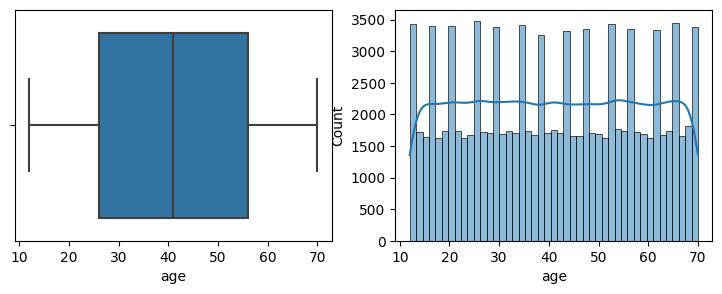

In [10]:
# Vẽ boxplot cho biến age
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_customer['age'])
plt.subplot(1, 2, 2)
sns.histplot(x=df_customer['age'], kde=True)

Độ tuổi của khách hàng phân bố chủ yếu từ 25 đến 55 tuổi. Không có giá trị ngoại lai (outliner) trong biến độ tuổi (age)

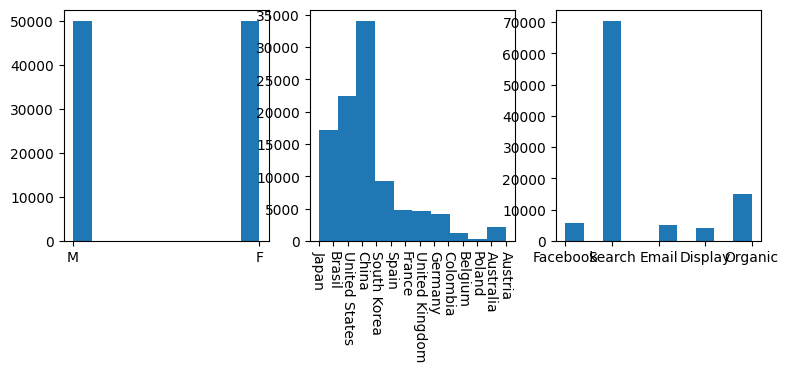

In [11]:
#Vẽ biểu đồ cột thể hiện lần lượt 3 biến: sex, country, traffic_src
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.hist(df_customer['sex'])

plt.subplot(132)
plt.hist(df_customer['country'])
plt.xticks(rotation=-90)

plt.subplot(133)
plt.hist(df_customer['traffic_src'])

plt.show()


- Số lượng khách hàng nam và khách hàng nữ không có sự chênh lệch đáng kể
- Số lượng khách hàng tập trung nhiều tại Hoa Kỳ
- Nguồn đầu tiên dẫn khách hàng đến với web là nguồn từ công cụ tìm kiếm (Search)

Bảng được nhập vào từ Power BI, thể hiện phân bổ số lượng khách hàng theo quốc gia

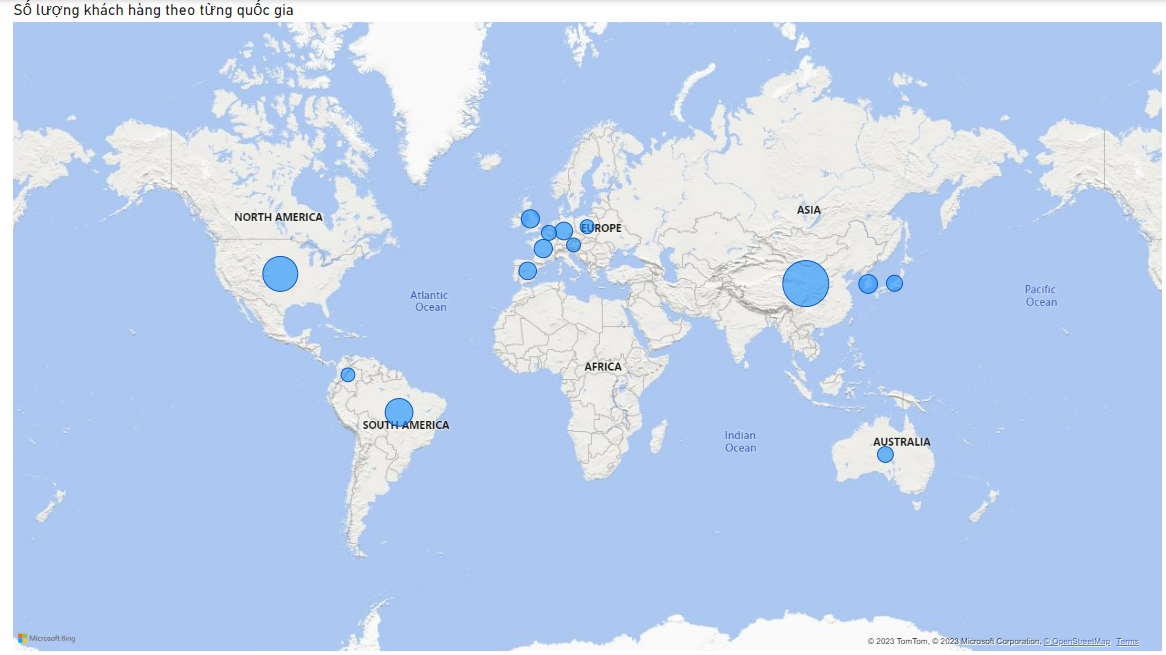

## 2. Events

In [12]:
df_event = pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/events.csv')
df_event.head()

,id,cus_id,sequence_number,session_id,created_at,ip,city,state,postal,browser,traffic_src,path,event_type
0,551,34.0,12,3c06e3f2-e8ed-4eb6-b24c-ccec40b8c2e7,2019-08-16 06:37:53 UTC,106.89.165.48,Kansas City,Kansas,66102,Chrome,Email,/cart,cart
1,1730,106.0,6,6d550704-9304-48df-990d-01fdbb676694,2021-02-22 05:56:40 UTC,103.12.134.61,New York,New York,11372,Chrome,Email,/cart,cart
2,2093,136.0,3,88457dec-f879-4f47-9585-98067ff94d75,2020-01-15 01:35:00 UTC,209.79.4.205,Beijing,Tianjin,300456,Firefox,Email,/cart,cart
3,2190,138.0,3,2729a4a5-1177-4a13-8419-f5f79f350876,2021-03-02 09:15:42 UTC,56.27.73.26,Quanzhou,Liaoning,110041,Chrome,Email,/cart,cart
4,2882,186.0,4,0933c284-960e-4f9b-9950-82e2d831c8e4,2020-01-19 00:54:42 UTC,45.195.175.235,Currais Novos,Rio Grande do Norte,59380-000,Safari,Email,/cart,cart


In [13]:
df_event['event_type'].unique()

array(['cart', 'home', 'cancel', 'product', 'purchase', 'department'],
      dtype=object)

In [14]:
#Xem xét các trường dữ liệu trong bảng
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420738 entries, 0 to 2420737
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   cus_id           float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip               object 
 6   city             object 
 7   state            object 
 8   postal           object 
 9   browser          object 
 10  traffic_src      object 
 11  path             object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 240.1+ MB


In [15]:
# Chuyển cột created_at sang kiểu datetime
df_event['created_at'] = df_event['created_at'].str.slice(0,18)
df_event['created_at'] = pd.to_datetime(df_event['created_at'])

In [16]:
#Kiểm tra giá trị null
df_event.isnull().sum()

id                       0
cus_id             1124065
sequence_number          0
session_id               0
created_at               0
ip                       0
city                 23958
state                    0
postal                   0
browser                  0
traffic_src              0
path                     0
event_type               0
dtype: int64

In [17]:
df_event.duplicated().sum()

0

Không có giá trị trùng lặp trong bảng event

In [18]:
df_event.describe()

,id,cus_id,sequence_number,created_at
count,2.420738e+06,1.296673e+06,2.420738e+06,2420738
mean,1.210370e+06,4.984494e+04,3.302979e+00,2021-03-10 08:45:54.701275648
min,1.000000e+00,1.000000e+00,1.000000e+00,2019-01-02 00:15:00
25%,6.051852e+05,2.489500e+04,1.000000e+00,2020-06-12 09:06:00
50%,1.210370e+06,4.975600e+04,2.000000e+00,2021-05-25 20:59:02.500000
75%,1.815554e+06,7.487600e+04,4.000000e+00,2022-01-20 01:54:46
max,2.420738e+06,1.000000e+05,1.300000e+01,2022-06-12 18:18:05
std,6.988070e+05,2.885942e+04,2.662963e+00,NaN


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'cart'),
  Text(1, 0, 'home'),
  Text(2, 0, 'cancel'),
  Text(3, 0, 'product'),
  Text(4, 0, 'purchase'),
  Text(5, 0, 'department')])

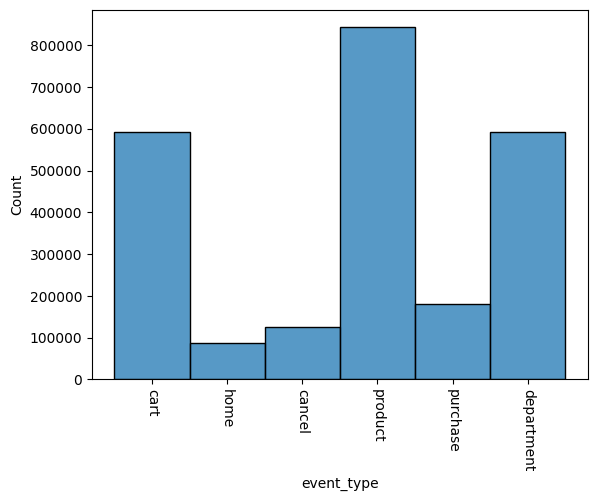

In [19]:
#Vẽ biểu đồ cột thể hiện số lượng các loại hoạt động trong bảng event
sns.histplot(x=df_event['event_type'])
plt.xticks(rotation=-90)

Hoạt động được thực hiện nhiều nhất trên web là xem danh mục sản phẩm, xem sản phẩm và xem giỏ hàng. Những hoạt động này có thể xem là tiềm năng cho hoạt động mua hàng. Tuy nhiên, mặc dù lượt xem sản phẩm cao, nhưng số lượng đặt mua lại thấp

<Axes: xlabel='event_type', ylabel='sequence_number'>

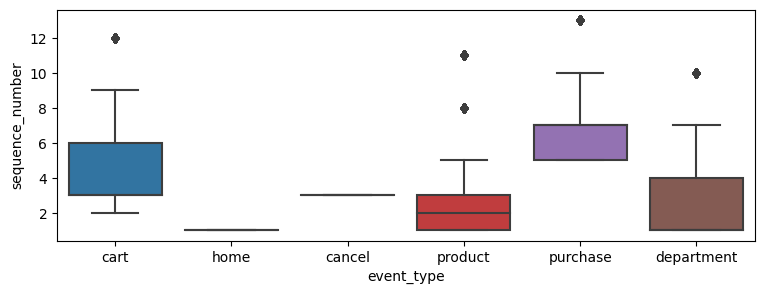

In [20]:
# vẽ boxplot của biến sequence_number theo từng event_type
plt.figure(figsize=(9, 3))
sns.boxplot(x=df_event['event_type'], y=df_event['sequence_number'])

Text(0.5, 1.0, 'Biểu đồ tổng số các sự kiện theo tháng')

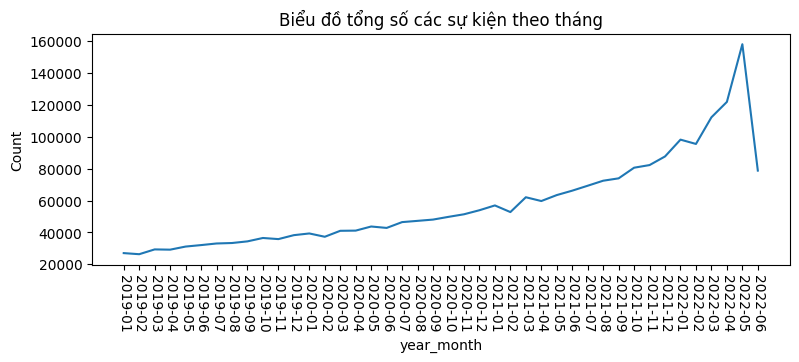

In [21]:
# Tạo cột năm tháng từ cột created_at
df_event['year_month'] = df_event['created_at'].dt.strftime('%Y-%m')
# Vẽ line chart tổng số các sự kiện theo tháng
plt.figure(figsize=(9, 3))
plt.plot(df_event['year_month'].value_counts().sort_index().index,
            df_event['year_month'].value_counts().sort_index().values)
plt.xticks(rotation=-90)
plt.xlabel('year_month')
plt.ylabel('Count')
plt.title('Biểu đồ tổng số các sự kiện theo tháng')

In [22]:
# tạo bảng gồm số hành động trong một session, chuỗi các sự kiện trong một session, thời gian bắt đầu và kết thúc của một session, group by session_id
df_session = df_event.groupby('session_id').agg(
    {'event_type': lambda x: ' '.join(x),
        'sequence_number': 'max',   
        'created_at': ['min', 'max'],
        'traffic_src': 'first',
        'browser': 'first',
        }
).reset_index()
df_session.head()

session_id  \
                                          
0  00000447-903c-4b86-85c7-55edefb3ad73   
1  000005b7-07e4-48d3-aecc-1556aa1de28e   
2  000005f7-1446-44ce-abd2-4fc4955a9c3e   
3  000006d5-2115-4b8e-9910-e98231623d54   
4  00000f42-fa0b-4fe9-8c4e-e87703fb5ac8   

                              event_type sequence_number          created_at  \
                                <lambda>             max                 min   
0                     product department               2 2020-10-05 03:44:00   
1                    product cart cancel               3 2020-12-25 04:17:00   
2                    cart cancel product               3 2021-06-16 17:47:00   
3                                product               1 2021-04-01 02:24:00   
4  cart purchase home product department               5 2021-09-06 12:20:03   

                      traffic_src  browser  
                  max       first    first  
0 2020-10-05 04:08:00     Adwords   Chrome  
1 2020-12-25 04:36:00    Facebook  Firefox  
2 2021-06-16 17:57:00       Email   Safari  
3 2021-04-01 02:24:00     Adwords   Chrome  
4 2021-09-06 12:23:03     Adwords   Chrome

In [23]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680952 entries, 0 to 680951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   (session_id, )          680952 non-null  object        
 1   (event_type, <lambda>)  680952 non-null  object        
 2   (sequence_number, max)  680952 non-null  int64         
 3   (created_at, min)       680952 non-null  datetime64[ns]
 4   (created_at, max)       680952 non-null  datetime64[ns]
 5   (traffic_src, first)    680952 non-null  object        
 6   (browser, first)        680952 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 36.4+ MB


In [24]:
df_session.describe()

sequence_number                     created_at  \
                  max                            min   
count   680952.000000                         680952   
mean         3.554932  2020-12-14 02:35:08.344539648   
min          1.000000            2019-01-02 00:15:00   
25%          2.000000            2020-02-07 05:24:00   
50%          3.000000            2021-01-21 17:44:00   
75%          5.000000            2021-11-11 06:25:30   
max         13.000000            2022-06-08 18:57:00   
std          2.700235                            NaN   

                                      
                                 max  
count                         680952  
mean   2020-12-14 09:26:42.747239424  
min              2019-01-02 00:27:00  
25%              2020-02-07 07:59:03  
50%              2021-01-22 03:29:30  
75%              2021-11-11 14:42:00  
max              2022-06-12 18:18:05  
std                              NaN

(array([250237., 249763.,      0.,  87549.,      0.,  49842.,      0.,
         18753.,      0.,  24808.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

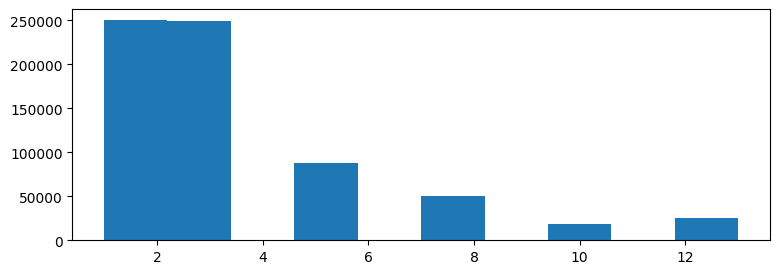

In [25]:
# vẽ histogram cho sequence_number
plt.figure(figsize=(9, 3))
plt.hist(df_session['sequence_number'])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chrome'),
  Text(1, 0, 'Firefox'),
  Text(2, 0, 'Safari'),
  Text(3, 0, 'IE'),
  Text(4, 0, 'Other')])

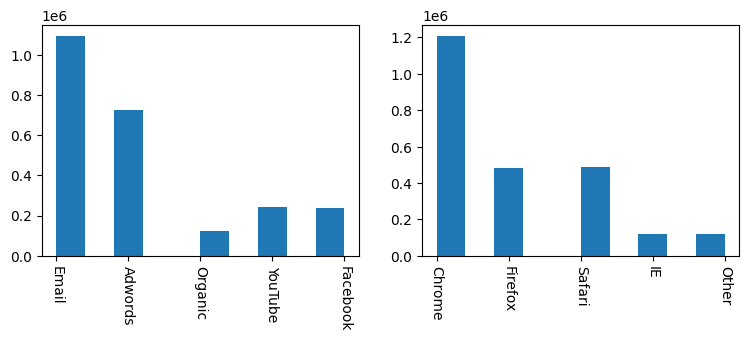

In [26]:
# vẽ histogram của biến traffic_src và browser
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.hist(df_event['traffic_src'])
plt.xticks(rotation=-90)

plt.subplot(122)
plt.hist(df_event['browser'])
plt.xticks(rotation=-90)

Nguồn dẫn khách hàng đến với web trong 1 phiên hoạt động chủ yếu là từ Email, Adwords và từ trình duyệt Chrome. Từ 2 biểu đồ có thể thấy sự chênh lệch lớn giữa các nguồn và các trang trình duyệt. Điều đáng quan tâm nhất nằm ở nguồn truy cập, vì các nguồn Organic và các kênh mạng xã hội chưa thực sự mang lại hiệu quả.

## 3. Fulfillment

In [27]:
df_fulfill = pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/fulfillment.csv')
df_fulfill.head()

,id,name,lat,long
0,1,TN,35.112119,-89.973777
1,2,IL,41.837615,-87.680856
2,3,TX,29.765003,-95.360446
3,4,CA,34.040176,-118.244589
4,5,LA,29.947774,-90.061055


In [28]:
df_fulfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10 non-null     int64  
 1   name    10 non-null     object 
 2   lat     10 non-null     float64
 3   long    10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [29]:
#Xem giá trị NaN
df_fulfill.isnull().sum()

id      0
name    0
lat     0
long    0
dtype: int64

In [30]:
#Kiểm tra giá trị trùng lặp
df_fulfill.duplicated().sum()

0

## 4. Order 

### 4.1. Bảng order

In [31]:
df_order= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/orders.csv')
df_order.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,1,1,Returned,Male,2019-06-04 10:10:00 UTC,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2
1,2,2,Processing,Female,2022-05-23 14:42:00 UTC,NaN,NaN,NaN,1
2,3,3,Complete,Male,2020-06-20 15:09:00 UTC,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3
3,4,3,Complete,Male,2021-08-23 15:09:00 UTC,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3
4,5,3,Shipped,Male,2021-07-01 15:09:00 UTC,NaN,2021-07-03 11:21:00 UTC,NaN,1


In [32]:
#Xem xét các trường dữ liệu trong bảng
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124923 entries, 0 to 124922
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      124923 non-null  int64 
 1   cus_id        124923 non-null  int64 
 2   status        124923 non-null  object
 3   sex           124923 non-null  object
 4   created_at    124923 non-null  object
 5   returned_at   12570 non-null   object
 6   shipped_at    81252 non-null   object
 7   delivered_at  43598 non-null   object
 8   num_of_item   124923 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [33]:
#Chuyển created_at, returned_at, shipped_at, delivered_at
df_order['created_at']= df_order['created_at'].str.slice(0,18)
df_order['created_at']= pd.to_datetime(df_order['created_at'], format='%Y-%m-%d %H:%M:%S')

df_order['returned_at']= df_order['returned_at'].str.slice(0,18)
df_order['returned_at']= pd.to_datetime(df_order['returned_at'], format='%Y-%m-%d %H:%M:%S')

df_order['shipped_at']= df_order['shipped_at'].str.slice(0,18)
df_order['shipped_at']= pd.to_datetime(df_order['shipped_at'], format='%Y-%m-%d %H:%M:%S')

df_order['delivered_at']= df_order['delivered_at'].str.slice(0,18)
df_order['delivered_at']= pd.to_datetime(df_order['delivered_at'], format='%Y-%m-%d %H:%M:%S')

In [34]:
#Kiểm tra giá trị NaN
df_order.isnull().sum()

order_id             0
cus_id               0
status               0
sex                  0
created_at           0
returned_at     112353
shipped_at       43671
delivered_at     81325
num_of_item          0
dtype: int64

Với số lượng dữ liệu missing tại 3 trường returned_at, shipped_at, delivered_at có thể làm giảm chất lượng bảng dữ liệu và gây ra sai số trong kết quả nếu dữ liệu missing này nằm tương ứng với trạng thái returned, shipped, complete trong trường status. Nếu không rơi vào những trường hợp vừa nêu thì giá trị NaN này không gây ảnh hưởng.

In [35]:
#Kiểm tra giá trị trùng lặp
df_order.duplicated().sum()

0

In [36]:
#Kiểm tra trạng thái đơn hàng
df_order.status.value_counts()

status
Shipped       37654
Complete      31028
Processing    24948
Cancelled     18723
Returned      12570
Name: count, dtype: int64

In [37]:
#Phân tích số lượng sản phẩm trong 1 đơn hàng
df_order.num_of_item.describe()

count    124923.000000
mean          1.448508
std           0.803312
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: num_of_item, dtype: float64

Số lượng sản phẩm trung bình cho 1 đơn là 1.4 sản phẩm, số lượng cao nhất là 4 sản phẩm/đơn và thấp nhất là 1 sản phẩm/đơn, với độ lệch chuẩn là 0.8

Text(0.5, 1.0, 'Số lượng sản phẩm trên đơn hàng')

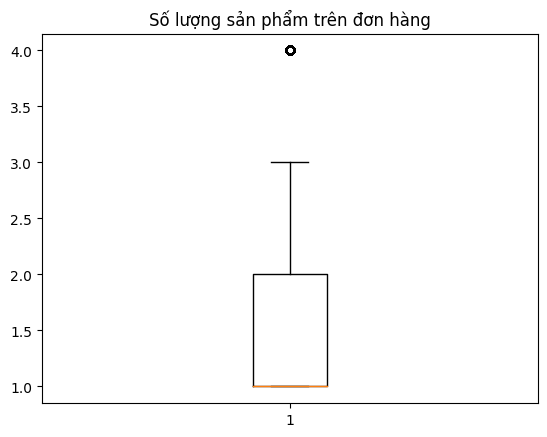

In [38]:
#Vẽ boxplot của biến số lượng sản phẩm trên 1 đơn hàng
plt.boxplot(df_order.num_of_item)
plt.title('Số lượng sản phẩm trên đơn hàng')

Theo giá trị được thể hiện trên đồ thị boxplot, có thể thấy việc khách hàng mua 4 sản phẩm trên đơn là ngoại lai trong biến num_of_item

In [39]:
df_complete= df_order[df_order['status'] == 'Complete']
df_complete[df_complete['num_of_item']==4].count()

order_id        1554
cus_id          1554
status          1554
sex             1554
created_at      1554
returned_at        0
shipped_at      1554
delivered_at    1554
num_of_item     1554
dtype: int64

In [40]:
df_complete[df_complete['num_of_item']<4].count()

order_id        29474
cus_id          29474
status          29474
sex             29474
created_at      29474
returned_at         0
shipped_at      29474
delivered_at    29474
num_of_item     29474
dtype: int64

In [41]:
df_order[df_order['num_of_item']<4].count()

order_id        118721
cus_id          118721
status          118721
sex             118721
created_at      118721
returned_at      11965
shipped_at       77203
delivered_at     41439
num_of_item     118721
dtype: int64

In [42]:
#Tính số lượng khách hàng nam và nữ
df_order['sex'].value_counts()

sex
Male      62524
Female    62399
Name: count, dtype: int64

### 4.2. Bảng order_detail

In [43]:
df_orderde= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/order_details.csv')
df_orderde.head()

,id,order_id,item_id,inventory_id,sale_price
0,15721,10826,13606,42278,2.5
1,19167,13243,13606,51560,2.5
2,77007,53140,13606,207367,2.5
3,151639,104681,13606,408715,2.5
4,170817,117931,13606,460556,2.5


In [44]:
df_orderde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180952 entries, 0 to 180951
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            180952 non-null  int64  
 1   order_id      180952 non-null  int64  
 2   item_id       180952 non-null  int64  
 3   inventory_id  180952 non-null  int64  
 4   sale_price    180952 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.9 MB


In [45]:
df_orderde.isnull().sum()

id              0
order_id        0
item_id         0
inventory_id    0
sale_price      0
dtype: int64

In [46]:
df_orderde.duplicated().sum()

0

In [47]:
df_orderde.sale_price.describe()

count    180952.000000
mean         59.457094
std          65.545107
min           0.020000
25%          24.500000
50%          39.990002
75%          69.949997
max         999.000000
Name: sale_price, dtype: float64

Giá bán lẻ trung bình của 1 sản phẩm là 59.5 (dvt), giá bán cao nhất là 999 (dvt) và giá thấp nhất là gần bằng 0

{'whiskers': [<matplotlib.lines.Line2D at 0x2b72154dc90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b72154e0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b72154d9f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b72154e5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b72154e890>],
 'means': []}

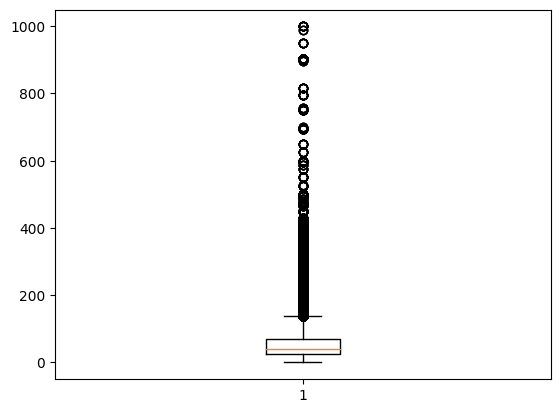

In [48]:
#Vẽ đồ thị boxplot để xem xét các khoảng giá trị của biến sale_price
plt.boxplot(df_orderde.sale_price)

### 4.3. Join 2 bảng orders và order_detail

In [49]:
df_order = pd.merge(df_order, df_orderde, on='order_id', how='right')
df_order.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,id,item_id,inventory_id,sale_price
0,10826,8614,Shipped,Female,2020-06-28 02:01:00,NaT,2020-06-29 04:40:00,NaT,1,15721,13606,42278,2.5
1,13243,10505,Shipped,Female,2022-03-01 06:58:00,NaT,2022-03-01 20:48:00,NaT,1,19167,13606,51560,2.5
2,53140,42340,Shipped,Female,2021-04-11 02:38:00,NaT,2021-04-14 00:32:00,NaT,1,77007,13606,207367,2.5
3,104681,83704,Shipped,Female,2022-03-30 00:33:00,NaT,2022-03-30 12:41:00,NaT,1,151639,13606,408715,2.5
4,117931,94363,Shipped,Female,2021-02-17 11:35:00,NaT,2021-02-19 19:03:00,NaT,1,170817,13606,460556,2.5


In [50]:
# tạo bảng order_summary gồm cột order_id, cột num_of_item và cột sale_price group by order_id
df_order_summary = df_order.groupby(['order_id','num_of_item']).agg(
    {'sale_price': 'sum'}
).reset_index()

df_order_summary.head()

,order_id,num_of_item,sale_price
0,1,2,63.990002
1,2,1,58.990002
2,3,3,93.490002
3,4,3,85.640001
4,5,1,279.000000


<Axes: xlabel='num_of_item', ylabel='sale_price'>

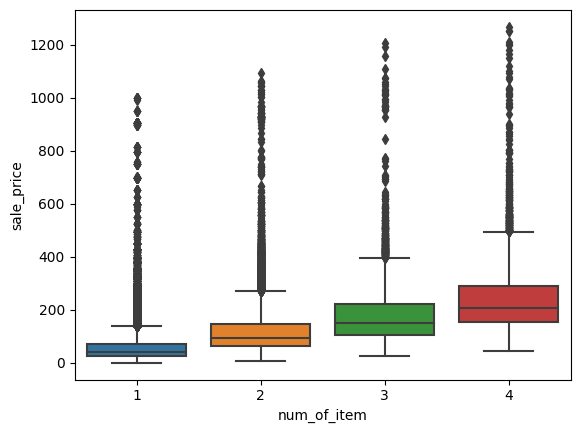

In [51]:
# vẽ box plot sale_price theo num_of_item
sns.boxplot(y=df_order_summary['sale_price'],x=df_order_summary['num_of_item'])

## 5. Item

In [52]:
df_item = pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/items.csv')
df_item.head()

,id,cost,category,brand,retail_price,department,fulfillment_id
0,27569,92.652563,Swim,2XU,150.410004,Men,1
1,27445,23.719661,Swim,TYR,38.990002,Men,1
2,27457,15.597600,Swim,TYR,27.600000,Men,1
3,27466,17.850000,Swim,TYR,30.000000,Men,1
4,27481,28.608001,Swim,TYR,45.950001,Men,1


In [53]:
df_item['category'].unique()

array(['Swim', 'Jeans', 'Pants', 'Socks', 'Active', 'Shorts', 'Sweaters',
       'Underwear', 'Accessories', 'Tops & Tees', 'Sleep & Lounge',
       'Outerwear & Coats', 'Suits & Sport Coats',
       'Fashion Hoodies & Sweatshirts', 'Plus', 'Suits', 'Skirts',
       'Dresses', 'Leggings', 'Intimates', 'Maternity', 'Clothing Sets',
       'Pants & Capris', 'Socks & Hosiery', 'Blazers & Jackets',
       'Jumpsuits & Rompers'], dtype=object)

In [54]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29120 non-null  int64  
 1   cost            29120 non-null  float64
 2   category        29120 non-null  object 
 3   brand           29096 non-null  object 
 4   retail_price    29120 non-null  float64
 5   department      29120 non-null  object 
 6   fulfillment_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [55]:
df_item.describe()

,id,cost,retail_price,fulfillment_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.428148,59.220164,4.982898
std,8406.364256,30.627790,65.888927,2.901153
min,1.000000,-0.991700,0.020000,1.000000
25%,7280.750000,11.231200,24.000000,2.000000
50%,14560.500000,19.620575,39.990002,5.000000
75%,21840.250000,34.368412,69.949997,8.000000
max,29120.000000,557.451002,999.000000,10.000000


In [56]:
#Kiểm tra giá trị NaN
df_item.isnull().sum()

id                 0
cost               0
category           0
brand             24
retail_price       0
department         0
fulfillment_id     0
dtype: int64

In [57]:
#Kiểm tra giá trị lặp lại
df_item.duplicated().sum()

0

In [58]:
#Xem xét biến chi phí
df_item.cost.describe()

count    29120.000000
mean        28.428148
std         30.627790
min         -0.991700
25%         11.231200
50%         19.620575
75%         34.368412
max        557.451002
Name: cost, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b721469f60>,
 'caps': [<matplotlib.lines.Line2D at 0x2b72146a4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b721469cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b72146a9e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b72146ac80>],
 'means': []}

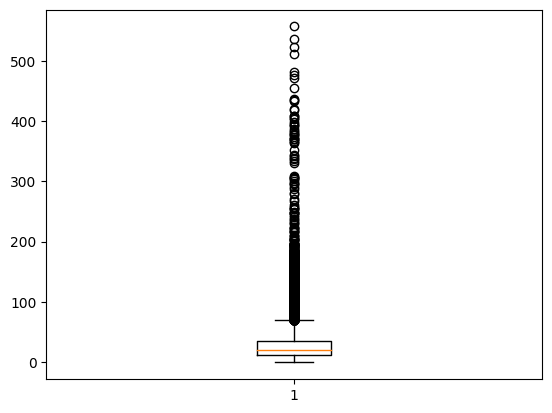

In [59]:
#Vẽ đồ thị boxplot của biến chi phí
plt.boxplot(df_item['cost'])

Chi phí dao động chủ yếu từ 0 đến 63.77

In [60]:
#Đếm số lượng sản phẩm có chi phí cao hơn 63.77
df_item[df_item['cost']>63.77].count()

id                2571
cost              2571
category          2571
brand             2571
retail_price      2571
department        2571
fulfillment_id    2571
dtype: int64

In [61]:
#Xem xét biến retail_price
df_item.retail_price.describe()

count    29120.000000
mean        59.220164
std         65.888927
min          0.020000
25%         24.000000
50%         39.990002
75%         69.949997
max        999.000000
Name: retail_price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b7584a1120>,
 'caps': [<matplotlib.lines.Line2D at 0x2b7584a1660>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b7584a0fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b7584a1ba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b7584a1e40>],
 'means': []}

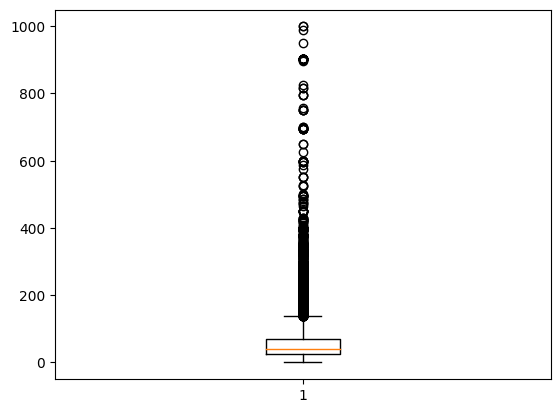

In [62]:
#Vẽ đồ thị boxplot của biến retail_price
plt.boxplot(df_item['retail_price'])

Giá bán lẻ trung bình là 59.22. Giá bán lẻ của các sản phẩm dao động trong khoảng từ 0 đến 129.9

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Swim'),
  Text(1, 0, 'Jeans'),
  Text(2, 0, 'Pants'),
  Text(3, 0, 'Socks'),
  Text(4, 0, 'Active'),
  Text(5, 0, 'Shorts'),
  Text(6, 0, 'Sweaters'),
  Text(7, 0, 'Underwear'),
  Text(8, 0, 'Accessories'),
  Text(9, 0, 'Tops & Tees'),
  Text(10, 0, 'Sleep & Lounge'),
  Text(11, 0, 'Outerwear & Coats'),
  Text(12, 0, 'Suits & Sport Coats'),
  Text(13, 0, 'Fashion Hoodies & Sweatshirts'),
  Text(14, 0, 'Plus'),
  Text(15, 0, 'Suits'),
  Text(16, 0, 'Skirts'),
  Text(17, 0, 'Dresses'),
  Text(18, 0, 'Leggings'),
  Text(19, 0, 'Intimates'),
  Text(20, 0, 'Maternity'),
  Text(21, 0, 'Clothing Sets'),
  Text(22, 0, 'Pants & Capris'),
  Text(23, 0, 'Socks & Hosiery'),
  Text(24, 0, 'Blazers & Jackets'),
  Text(25, 0, 'Jumpsuits & Rompers')])

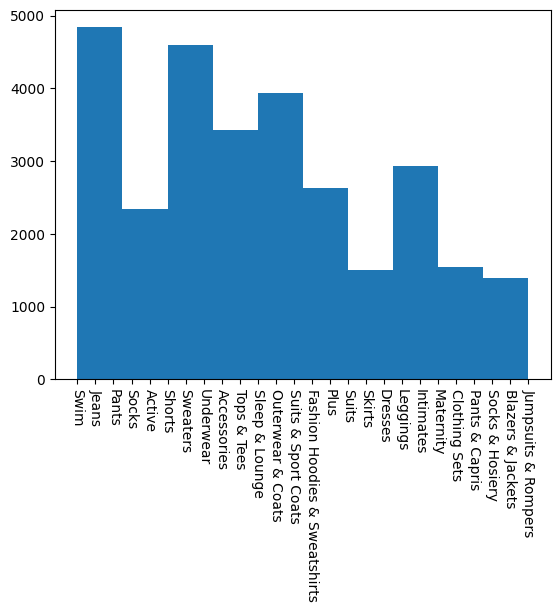

In [63]:
#Xem xét số lượng của từng loại sản phẩm
plt.hist(df_item['category'])
plt.xticks(rotation=-90)

Số lượng sản phẩm của doanh nghiệp có sự chênh lệch, chiếm số lượng nhiều nhất là swim, jeans, pants, shorts, sweaters...

## 6. Inventory

In [64]:
df_inventory = pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/inventory.csv')
df_inventory.head()

,id,item_id,created_at,sold_at
0,58100,16898,2021-07-13 13:48:37 UTC,2021-07-25 22:59:37 UTC
1,58101,16898,2021-08-26 05:08:00 UTC,NaN
2,60386,16898,2022-04-04 06:22:56 UTC,2022-05-23 07:33:56 UTC
3,60387,16898,2020-03-15 09:37:00 UTC,NaN
4,60388,16898,2020-11-23 14:49:00 UTC,NaN


In [65]:
#Xem xét giá trị của các trường
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487901 entries, 0 to 487900
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          487901 non-null  int64 
 1   item_id     487901 non-null  int64 
 2   created_at  487901 non-null  object
 3   sold_at     180952 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.9+ MB


In [66]:
#Kiểm tra giá trị NaN
df_inventory.isnull().sum()

id                 0
item_id            0
created_at         0
sold_at       306949
dtype: int64

Hơn 300000 giá trị missing tại trường sold_at chứng tỏ sản phẩm có thể bị lưu kho quá lâu, khó bán được